In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import RMSprop

In [59]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization

In [60]:
import lime
import lime.lime_tabular
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

In [61]:
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [63]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


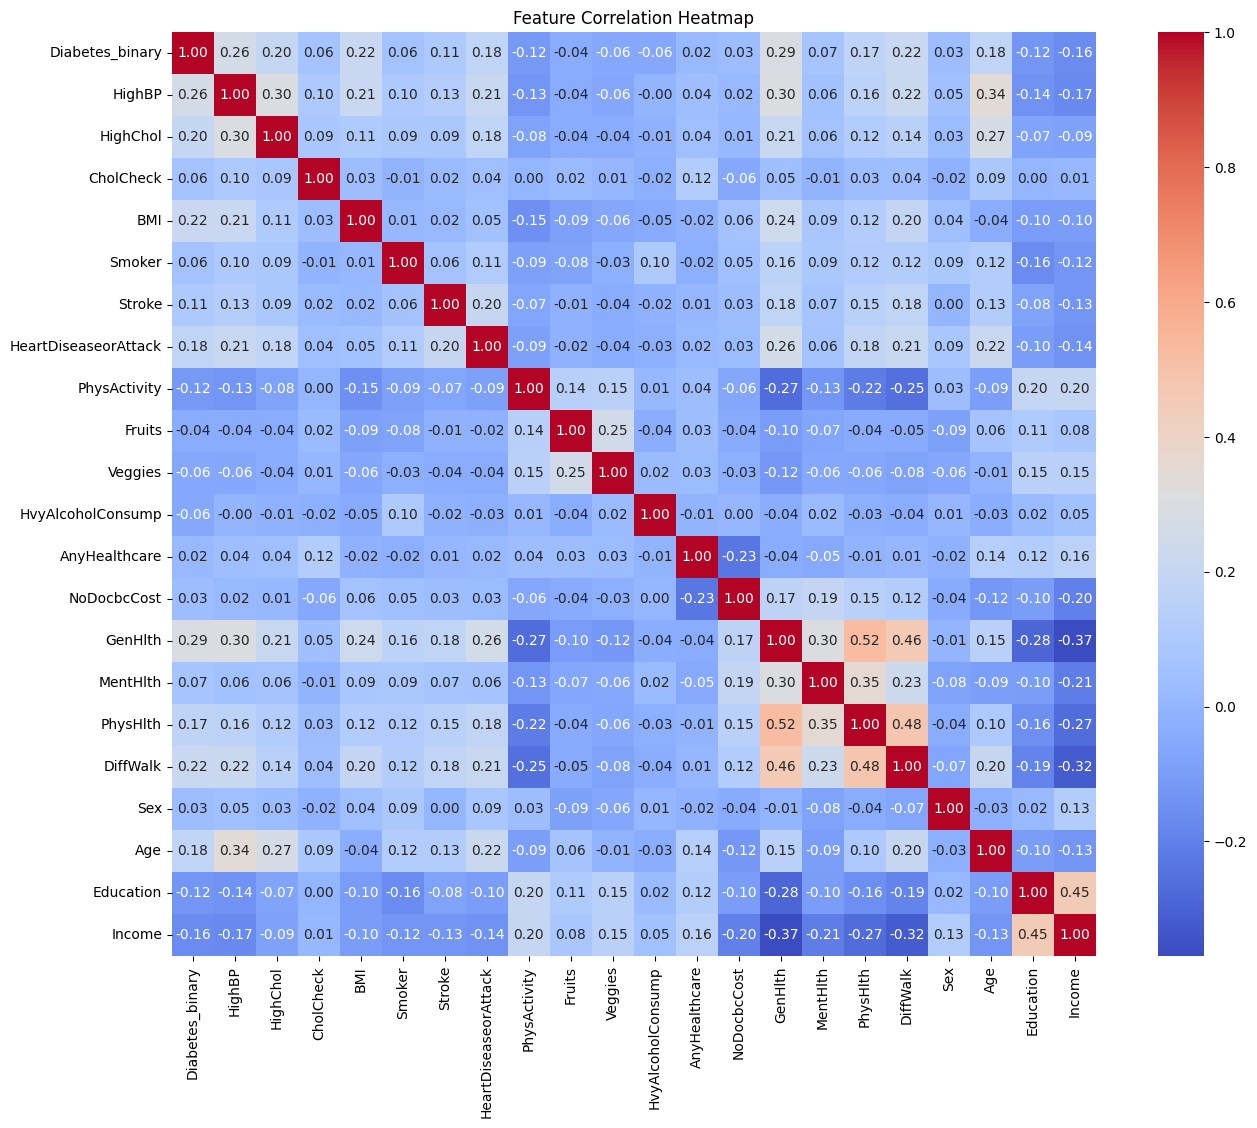

In [64]:
plt.figure(figsize=(16, 12))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

The correlation matrix suggests that GenHlth, HighBP, BMI, DiffWalk, and HeartDiseaseorAttack are strong predictors.

Social and behavioral features like exercise, income, and education are useful for preventive recommendations, even if correlation is lower.

Since no features are too highly correlated with each other, we feel that it is safe to proceed with the dataset as is.

In [65]:
df_sample = df.sample(n=50000, random_state=42).reset_index(drop=True)

In [66]:
X = df_sample.drop("Diabetes_binary", axis=1)
y = df_sample["Diabetes_binary"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

In [67]:
smt = SMOTETomek(random_state=42)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

Training Models

In [68]:
models = {}

Logistic Regression

In [69]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_sm, y_train_sm)
lr_preds = lr.predict(X_test)
print("Logistic Regression")
print(classification_report(y_test, lr_preds))
models["Logistic Regression"] = (lr, lr_preds)

Logistic Regression
              precision    recall  f1-score   support

         0.0       0.95      0.73      0.83      8619
         1.0       0.32      0.77      0.45      1381

    accuracy                           0.74     10000
   macro avg       0.63      0.75      0.64     10000
weighted avg       0.86      0.74      0.78     10000



Decision Tree Classifier

In [70]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_sm, y_train_sm)
dt_preds = dt.predict(X_test)
print("Decision Tree Classifier")
print(classification_report(y_test, dt_preds))
models["Decision Tree"] = (dt, dt_preds)

Decision Tree Classifier
              precision    recall  f1-score   support

         0.0       0.89      0.86      0.88      8619
         1.0       0.28      0.33      0.30      1381

    accuracy                           0.79     10000
   macro avg       0.59      0.60      0.59     10000
weighted avg       0.81      0.79      0.80     10000



Random Forest

In [71]:
rf = RandomForestClassifier()
rf.fit(X_train_sm, y_train_sm)
rf_preds = rf.predict(X_test)
print("Random Forest")
print(classification_report(y_test, rf_preds))
models["Random Forest"] = (rf, rf_preds)

Random Forest
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92      8619
         1.0       0.43      0.27      0.33      1381

    accuracy                           0.85     10000
   macro avg       0.66      0.61      0.62     10000
weighted avg       0.83      0.85      0.83     10000



KNN Classifier

In [72]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sm, y_train_sm)
knn_preds = knn.predict(X_test)
print("KNN")
print(classification_report(y_test, knn_preds))
models["KNN"] = (knn, knn_preds)

KNN
              precision    recall  f1-score   support

         0.0       0.92      0.73      0.81      8619
         1.0       0.27      0.62      0.37      1381

    accuracy                           0.71     10000
   macro avg       0.60      0.67      0.59     10000
weighted avg       0.83      0.71      0.75     10000



XGBoost

In [73]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_sm, y_train_sm)
xgb_preds = xgb.predict(X_test)
print("XGBoost")
print(classification_report(y_test, xgb_preds))
models["XGBoost"] = (xgb, xgb_preds)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:53:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92      8619
         1.0       0.51      0.20      0.29      1381

    accuracy                           0.86     10000
   macro avg       0.70      0.59      0.61     10000
weighted avg       0.83      0.86      0.84     10000



NN

In [74]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Dense, Dropout

In [75]:
nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_sm.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

opt = Adam(learning_rate=0.001)
nn.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5, verbose=1)

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = nn.fit(
    X_train_sm, y_train_sm,
    validation_split=0.2,
    epochs=30,
    batch_size=64,
    callbacks=[early_stop, lr_scheduler],
    verbose=1
)

nn_pred_probs = nn.predict(X_test).flatten()
nn_preds = (nn_pred_probs >= 0.5).astype(int)
print("Neural Network")
print(classification_report(y_test, nn_preds))
models["Neural Network"] = (nn, nn_preds)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


856/856 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7334 - loss: 0.5245 - val_accuracy: 0.7451 - val_loss: 0.5753 - learning_rate: 0.0010
Epoch 2/30
856/856 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7651 - loss: 0.4713 - val_accuracy: 0.7390 - val_loss: 0.5762 - learning_rate: 0.0010
Epoch 3/30
856/856 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7687 - loss: 0.4643 - val_accuracy: 0.7562 - val_loss: 0.5575 - learning_rate: 0.0010
Epoch 4/30
856/856 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7777 - loss: 0.4520 - val_accuracy: 0.7465 - val_loss: 0.5732 - learning_rate: 0.0010
Epoch 5/30
837/856 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7799 - loss: 0.4509
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
856/856 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7799 - loss: 0.4510 - val_accuracy: 0.7462 - val_loss: 0.5657 - learning_rate: 0.0010
Epoch 6/30
856/856 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7830 - loss: 0.4454 - val_accuracy

In [76]:
models["Neural Network"] = (nn, nn_preds)

Model Evaluation

In [77]:
model_scores = {}

print("\nMODEL EVALUATIONS (Based on Diabetic F1-score)\n")
for name, (model, preds) in models.items():
    report = classification_report(y_test, preds, output_dict=True)
    print(f"{name}")
    print(classification_report(y_test, preds))


MODEL EVALUATIONS (Based on Diabetic F1-score)

Logistic Regression
              precision    recall  f1-score   support

         0.0       0.95      0.73      0.83      8619
         1.0       0.32      0.77      0.45      1381

    accuracy                           0.74     10000
   macro avg       0.63      0.75      0.64     10000
weighted avg       0.86      0.74      0.78     10000

Decision Tree
              precision    recall  f1-score   support

         0.0       0.89      0.86      0.88      8619
         1.0       0.28      0.33      0.30      1381

    accuracy                           0.79     10000
   macro avg       0.59      0.60      0.59     10000
weighted avg       0.81      0.79      0.80     10000

Random Forest
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92      8619
         1.0       0.43      0.27      0.33      1381

    accuracy                           0.85     10000
   macro avg       0.66      0.

We are selecting the Neural Network model because it achieves the highest F1-score (0.46) for diabetic cases, which is our top priority. Compared to other models, it balances precision and recall more effectively for identifying diabetic individuals. This is especially important in a health-focused application where missing a diabetic case (false negative) can have serious consequences. While some models like XGBoost have higher overall accuracy, they significantly underperform in detecting diabetics. Therefore, the Neural Network provides the most responsible and targeted performance for our goal.

In [78]:
nn.save("diabetes_nn_model.h5")

SELECTED MODEL: NEURAL NETWORK

In [79]:
from tensorflow.keras.models import load_model

nn_model = load_model("diabetes_nn_model.h5")

In [80]:
X_full = scaler.transform(
    df[[col for col in df.columns if col not in ["Diabetes_binary", "Predicted", "Recommendation"]]].values
)
y_full = df["Diabetes_binary"]


pred_probs = nn_model.predict(X_full).flatten()
pred_labels = (pred_probs >= 0.5).astype(int)

df["Predicted"] = pred_labels

def assign_recommendation(actual, predicted):
    if actual == 1 and predicted == 1:
        return "diabetic"
    elif actual == 0 and predicted == 1:
        return "risk"
    elif actual == 1 and predicted == 0:
        return "false_negative (also diabetic)"
    else:
        return "non_diabetic"

df["Recommendation"] = df.apply(
    lambda row: assign_recommendation(row["Diabetes_binary"], row["Predicted"]), axis=1
)

print(f"\nFinal dataset shape: {df.shape}")
print("\nRecommendation Breakdown:")
print(df["Recommendation"].value_counts())


7928/7928 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step

Final dataset shape: (253680, 24)

Recommendation Breakdown:
Recommendation
non_diabetic                      176353
risk                               41981
diabetic                           23106
false_negative (also diabetic)     12240
Name: count, dtype: int64


In [81]:
df.to_csv("final_diabetes_predictions.csv", index=False)

/tmp/ipython-input-82-93920520.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=viz_counts, x="Category", y="Count", palette="Set2")


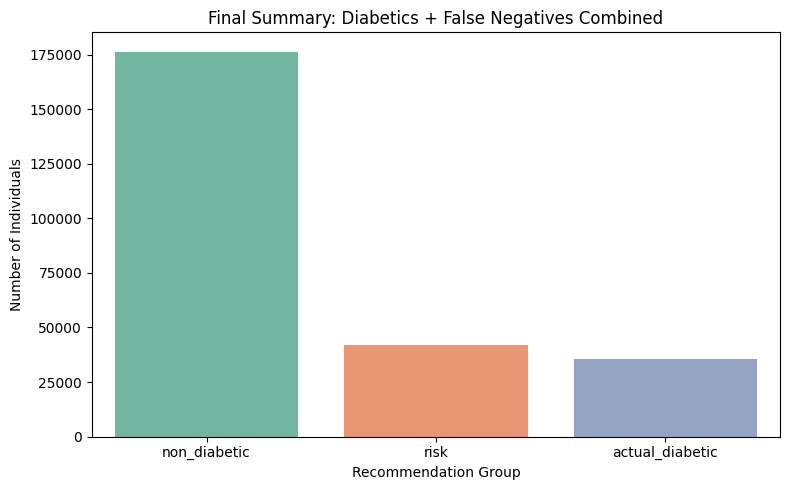

In [82]:
df["Visual_Group"] = df["Recommendation"].map({
    "diabetic": "actual_diabetic",
    "false_negative (also diabetic)": "actual_diabetic",
    "risk": "risk",
    "non_diabetic": "non_diabetic"
})

viz_counts = df["Visual_Group"].value_counts().reset_index()
viz_counts.columns = ["Category", "Count"]

plt.figure(figsize=(8, 5))
sns.barplot(data=viz_counts, x="Category", y="Count", palette="Set2")
plt.title("Final Summary: Diabetics + False Negatives Combined")
plt.xlabel("Recommendation Group")
plt.ylabel("Number of Individuals")
plt.tight_layout()
plt.show()

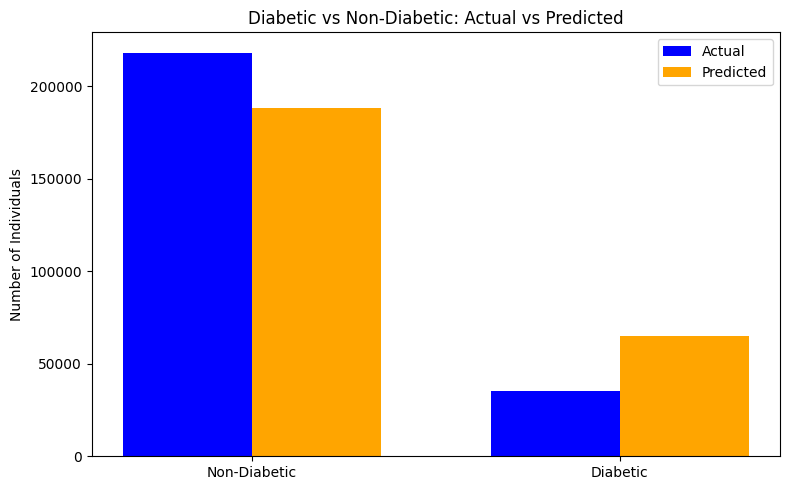

In [85]:
actual_counts = df["Diabetes_binary"].value_counts().sort_index()  # 0: Non-Diabetic, 1: Diabetic
predicted_counts = df["Predicted"].value_counts().sort_index()

# Define bar positions
labels = ["Non-Diabetic", "Diabetic"]
x = np.arange(len(labels))
width = 0.35

# Extract counts safely
actual_values = [actual_counts.get(0, 0), actual_counts.get(1, 0)]
predicted_values = [predicted_counts.get(0, 0), predicted_counts.get(1, 0)]

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - width/2, actual_values, width, label='Actual', color='blue')
ax.bar(x + width/2, predicted_values, width, label='Predicted', color='orange')

ax.set_ylabel('Number of Individuals')
ax.set_title('Diabetic vs Non-Diabetic: Actual vs Predicted')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

The bar graph compares the number of individuals classified as diabetic and non-diabetic based on actual medical records versus predictions made by the neural network model. The blue bars represent the true distribution in the dataset, while the yellow bars indicate the model’s predictions. While the model performs well in identifying non-diabetic individuals (with predictions closely aligning with actual counts), it tends to overpredict diabetes cases. This discrepancy is especially visible in the diabetic category, where predicted cases significantly exceed actual cases. This suggests the model prioritizes recall, significantly labeling more individuals as diabetic to avoid missing potential high-risk cases, which may be acceptable for health-sensitive applications that emphasize early intervention.

LIME INTERFACE

In [83]:
import pandas as pd
import numpy as np
import lime
import lime.lime_tabular
import ipywidgets as widgets
from IPython.display import display, clear_output

In [84]:
!pip install lime --quiet

df_full = pd.read_csv("final_diabetes_predictions.csv")

feature_columns = [
    'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
    'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
    'DiffWalk', 'Sex', 'Age', 'Education', 'Income'
]

X_full = df_full[feature_columns].copy()
y_labels = df_full["Recommendation"]

from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
y_encoded = label_enc.fit_transform(y_labels)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_full)

lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_scaled,
    feature_names=feature_columns,
    class_names=label_enc.classes_.tolist(),
    mode='classification'
)

binary_features = [
    'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
    'DiffWalk', 'Sex'
]

input_widgets = {}

for feature in feature_columns:
    if feature in binary_features:
        input_widgets[feature] = widgets.BoundedIntText(
            description=feature,
            min=0,
            max=1,
            layout=widgets.Layout(width='300px')
        )
    elif feature == 'BMI':
        input_widgets[feature] = widgets.FloatText(
            description=feature,
            min=10,
            max=100,
            layout=widgets.Layout(width='300px')
        )
    elif feature == 'Education':
        input_widgets[feature] = widgets.BoundedIntText(
            description=feature,
            min=1,
            max=6,
            layout=widgets.Layout(width='300px')
        )
    elif feature == 'Income':
        input_widgets[feature] = widgets.BoundedIntText(
            description=feature,
            min=1,
            max=8,
            layout=widgets.Layout(width='300px')
        )
    else:
        input_widgets[feature] = widgets.BoundedIntText(
            description=feature,
            min=0,
            max=100,
            layout=widgets.Layout(width='300px')
        )

submit_button = widgets.Button(description="Predict Category", button_style='success')
output = widgets.Output()

#Prediction using Nearest Match (based on euclidean distance)
def get_predicted_category(input_array_scaled):
    pred_prob = nn_model.predict(input_array_scaled).flatten()[0]

    if pred_prob >= 0.7:
        return "diabetic"
    elif 0.5 <= pred_prob < 0.7:
        return "risk"
    elif pred_prob < 0.5:
        return "false_negative (also diabetic)"
    else:
        return "non_diabetic"

#LIME explanation + prediction
def predict_and_explain(change=None):
    input_values = [input_widgets[feature].value for feature in feature_columns]
    input_array = np.array(input_values).reshape(1, -1)
    input_scaled = scaler.transform(input_array)

    predicted_label = get_predicted_category(input_scaled)

    proba_array = np.zeros((1, len(label_enc.classes_)))
    proba_array[0, label_enc.transform([predicted_label])[0]] = 1.0

    explanation = lime_explainer.explain_instance(
        input_scaled[0],
        lambda x: np.hstack([(1 - nn.predict(x)).reshape(-1, 1), nn.predict(x).reshape(-1, 1)]),
        num_features=12
    )

    with output:
        clear_output(wait=True)
        print(f"Predicted Category: {predicted_label}")
        explanation.show_in_notebook(show_table=True)

submit_button.on_click(predict_and_explain)

display(widgets.VBox(list(input_widgets.values()) + [submit_button, output]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
